In [2]:
import pandas as pd
import numpy as np
import collections
from nltk import tokenize
from nltk import ne_chunk
from nltk import tag
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

## (A) Applied Statistics: 

#### Ex 1.:- For a given set of values in stats.xls that contains the list of employees, years of experience and their salary write a python script to calculate the mean, mode and median. 

In [2]:
df=pd.read_excel("Stats.xlsx")
df.sort_values(by=['Salary in Rs.'], inplace=True)

count_of_df=df['Salary in Rs.'].count()
sum_of_df=df['Salary in Rs.'].sum()

# find the mean
mean=sum_of_df/count_of_df

#find the median
n=(count_of_df+1)//2
list_of_data=list(df['Salary in Rs.'])
median=list_of_data[n-1]

#find the mode
data = collections.Counter(list_of_data)
data=dict(data)
max_value = max(list(data.values()))
for key,value in data.items():
    if max_value==value:
        mode=key

print("mean is = {0}, median is = {1}, mode is = {2} ".format(mean,median,mode))

mean is = 77821.2, median is = 87654, mode is = 100639 


#### Ex2.:-  For the above exercise determine the standard deviation and variance through python scripting.

In [3]:
from math import sqrt
sqr_diff=[]
for l in list_of_data:
    sqr_diff.append((l-mean)**2)
variance=sum(sqr_diff)/count_of_df
Standard_deviation=sqrt(variance)
print("Standard deviation={0}, variance= {1}".format(Standard_deviation,variance))

Standard deviation=39042.52996208109, variance= 1524319145.84


#### (B) Natural Language Processing: 

#### Ex 1.:- Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform sentence tokenization and redirects in to column of data_out.csv. Perform the NE Chunking on these sentences.

In [3]:
data=pd.read_csv("data.csv")


#method to genrate tokens
def sen_tokenizer(data):
    return tokenize.sent_tokenize(data)

def pos_tag(data):
    return tag.pos_tag(data)
data_sent =pd.DataFrame(data['Comment'].apply(lambda x:sen_tokenizer(x)))
data_sent.to_csv("data_out.csv",index=False)


#Perform the NE Chunking
data_tagged = data_sent['Comment'].apply(lambda x:pos_tag(x))

for i,j in enumerate(data_tagged):
    chunks = nltk.ne_chunk(data_tagged[i])
    print(chunks.leaves())      

[('"Hello there, how are you?', 'JJ'), ('Weather is awesome.', 'NNP'), ('Its raining here now."', 'NNP')]
[('"Hello Mr. Raja, how are you?', 'JJ'), ('Weather is awesome.', 'NNP'), ('Its raining here now."', 'NNP')]
[('"Hello Mr. Raja, how are you.', 'JJ'), ('Weather is bad.', 'NNP'), ('Its heavily raining here now."', 'NNP')]
[('"NLP is great technique.', 'NN'), ('It is nice to learn this technique."', 'NNP')]
[('"AI is making difference in this world now.', 'JJ'), ('It would be helpful for betterment of human life.', 'NNP'), ('We need to make advantage of that."', 'NNP')]


#### Ex 2. :- Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform word tokenization and redirects in to column of data_out.csv

In [4]:
data=pd.read_csv("data.csv")


#method to genrate tokens
def word_tokenizer(data):
    return tokenize.word_tokenize(data)
data_word =pd.DataFrame(data['Comment'].apply(lambda x:word_tokenizer(x)),columns=['Comment'])
data_word.to_csv("word_tokonize_out.csv",index=False)

#### Ex3.:- From an input file data.txt it is required to identify the POS-Tagging and display it on tree structure.

In [5]:
data=pd.read_csv("data.csv")
def word_tokenizer(data):
    return tokenize.word_tokenize(data)

def pos_tag(data):
    return tag.pos_tag(data)

data_word =pd.DataFrame(data['Comment'].apply(lambda x:word_tokenizer(x)))
data_tagged = data_word['Comment'].apply(lambda x:pos_tag(x))

grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
#result = cp.parse(data_tagged)
for d in data_tagged:
    result = cp.parse(d)
    result.draw()

#### Ex 4. For a given text file exclude the stop words and perform the Stemming & lemmatization and compare the results.

In [6]:
data=pd.read_csv("data.csv")
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = SnowballStemmer("english")
def word_tokenizer(data):
    return tokenize.word_tokenize(data)

def Lemmatizer(text):
    return [lemmatizer.lemmatize(w) for w in text]

def Stemmer(text):
    return [stemmer.stem(w) for w in text]

data_word =pd.DataFrame(data['Comment'].apply(lambda x:word_tokenizer(x)))
data_word_sw=pd.DataFrame(data_word['Comment'].apply(lambda x: [item for item in x if item not in stopwords.words("english")]),columns=['Comment'])
data_word_lm=pd.DataFrame(data_word_sw.Comment.apply(Lemmatizer),columns=["Comment"])
data_word_sm=pd.DataFrame(data_word_sw.Comment.apply(Stemmer),columns=["Comment"])
data_word_sm
data_word_lm


,Comment
0,"[``, Hello, ,, ?, Weather, awesome, ., Its, ra..."
1,"[``, Hello, Mr., Raja, ,, ?, Weather, awesome,..."
2,"[``, Hello, Mr., Raja, ,, ., Weather, bad, ., ..."
3,"[``, NLP, great, technique, ., It, nice, learn..."
4,"[``, AI, making, difference, world, ., It, wou..."


#### Ex 5. Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment. 

In [7]:
input_reviews = {"It is an amazing movie":0.78, 
       "This is a dull movie. I would never recommend it to anyone.":0.35,
       "The cinematography is pretty great in this movie":0.88, 
       "The direction was terrible and the story was all over the place":0.32 
}
santiment={}
threshold=0.50
for key,value in input_reviews.items():
    if value>0.50:
        santiment.update({key:'positive'})
    else:
        santiment.update({key:'negative'})
print(santiment)
    

{'It is an amazing movie': 'positive', 'This is a dull movie. I would never recommend it to anyone.': 'negative', 'The cinematography is pretty great in this movie': 'positive', 'The direction was terrible and the story was all over the place': 'negative'}


### (C) Machine Learning: 

#### Ex 1. Data:

In [8]:
import pandas as pd
import numpy as np

columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
data=pd.read_csv("auto-mpg.data",delim_whitespace=True,names=columns)#, sep=','
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
#find any column has missing value, check the data type of the columns
data.dtypes

# horsepower has data type as object but it should be either int or float. 
#replace missing value to Nan than mean
horsepower_missing_index=data[data.horsepower=='?'].index
data.loc[horsepower_missing_index, 'horsepower'] = float('NaN')
data.horsepower = data.horsepower.apply(pd.to_numeric)
data.loc[horsepower_missing_index, 'horsepower'] = int( data.horsepower.mean())

#car name is unique for each instance for it will not give any importance. We will remove this
data.drop(['car name'], axis=1,inplace=True)

#### Ex 2.:- Import relevant python libraries and sklearn linear_model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Ex 3. Split the file into train [80%] and test [20%] data

In [11]:
#get target variable and independent variable.
y=pd.DataFrame(data['mpg'])
X=pd.DataFrame(data['model year'])
train_X,test_X,train_y,test_y = train_test_split(X,y ,test_size=0.20)

#### Ex.4 Apply linear regression

In [12]:
Regresser=LinearRegression()

#### Ex.5 Train the model using the training sets

In [13]:
Regresser.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Ex.6 Display the coefficients coef, intercept and residues

In [14]:
Coefficients=Regresser.coef_
intercept= Regresser.intercept_
print("Coefficients {0}".format(Coefficients))
print("intercept {0}".format(intercept))

Coefficients [[1.25234879]]
intercept [-71.63255403]


In [15]:
Residuals=pd.DataFrame(train_y-Regresser.predict(train_X)).abs()
print("Residuals {0}".format(Residuals))


Residuals            mpg
63    4.536559
306   1.496999
148   4.958743
89    4.788908
125   1.041257
..         ...
145  10.958743
294   6.796999
307   0.503001
47    1.715790
234   0.298303

[318 rows x 1 columns]


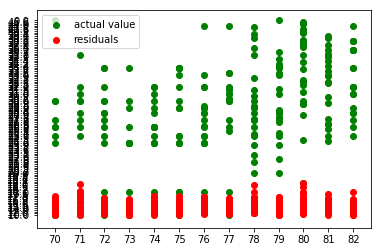

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(20)
sub = plt.subplot(111)
sub.scatter(train_X, train_y,  color='green',label='actual value')
sub.scatter(train_X, Residuals,  color='red',label='residuals')
sub.legend()
plt.show()

#### Ex.7 Predict using test data

In [20]:
test_predict=Regresser.predict(test_X)

#### Ex.8 Perform Accuracy check using the R Square

In [21]:
from sklearn.metrics import r2_score
print("r2 score:- {0}".format(r2_score(test_y,test_predict)))

r2 score:- 0.30756133455512025


#### Ex.9 Display using scatter plot the data points and the best fit line

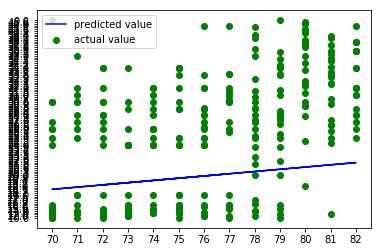

In [22]:
fig = plt.figure(20)
sub = plt.subplot(111)
sub.scatter(train_X, train_y,  color='green',label='actual value')
sub.plot(train_X,Regresser.predict(train_X), color='blue',label='predicted value') #intercept Coefficients,Residuals
sub.legend()
plt.show()

### Multi-variate Regression

#### Ex 1. Use the downloaded data

In [23]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Ex 2. Convert this data to array 

In [27]:
import numpy as np
y=pd.DataFrame(data['mpg']).to_numpy
X=pd.DataFrame(data.iloc[:,1:]).to_numpy

#### Ex 3. Define the learning rate and no. of iterations as 0.0001 and 1000 respectively along with y-intercept and slope

In [30]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function

#### Ex 4. Create the functions to get the BEST FIT line 

In [31]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

Iteration 196 
X value is -4.847454000530796
Iteration 197 
X value is -4.85050492052018
Iteration 198 
X value is -4.853494822109776
Iteration 199 
X value is -4.85642492566758
Iteration 200 
X value is -4.859296427154229
Iteration 201 
X value is -4.862110498611145
Iteration 202 
X value is -4.864868288638922
Iteration 203 
X value is -4.867570922866143
Iteration 204 
X value is -4.87021950440882
Iteration 205 
X value is -4.872815114320644
Iteration 206 
X value is -4.875358812034231
Iteration 207 
X value is -4.877851635793546
Iteration 208 
X value is -4.880294603077676
Iteration 209 
X value is -4.882688711016122
Iteration 210 
X value is -4.8850349367958
Iteration 211 
X value is -4.887334238059884
Iteration 212 
X value is -4.8895875532986866
Iteration 213 
X value is -4.891795802232712
Iteration 214 
X value is -4.893959886188058
Iteration 215 
X value is -4.896080688464297
Iteration 216 
X value is -4.898159074695011
Iteration 217 
X value is -4.9001958932011105
Iteration 218

X value is -4.9999062125935705
Iteration 563 
X value is -4.999908088341699
Iteration 564 
X value is -4.9999099265748645
Iteration 565 
X value is -4.999911728043367
Iteration 566 
X value is -4.9999134934825
Iteration 567 
X value is -4.99991522361285
Iteration 568 
X value is -4.999916919140593
Iteration 569 
X value is -4.999918580757781
Iteration 570 
X value is -4.999920209142625
Iteration 571 
X value is -4.999921804959773
Iteration 572 
X value is -4.9999233688605775
Iteration 573 
X value is -4.999924901483366
Iteration 574 
X value is -4.999926403453699
Iteration 575 
X value is -4.999927875384625
Iteration 576 
X value is -4.999929317876933
Iteration 577 
X value is -4.999930731519394
Iteration 578 
X value is -4.999932116889006
Iteration 579 
X value is -4.999933474551226
Iteration 580 
X value is -4.999934805060202
Iteration 581 
X value is -4.999936108958998
Iteration 582 
X value is -4.999937386779818
Iteration 583 
X value is -4.999938639044221
Iteration 584 
X value is

### Machine Learning KNN assignments

In [32]:
columns=['Age','year_of_operation','Number_of_positive_nodes','Survival_status']
data_knn=pd.read_csv('haberman.data',names=columns)#, sep=',' delim_whitespace=True
data_knn.head()


,Age,year_of_operation,Number_of_positive_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Ex 2. Import relevant python libraries and sklearn KNN model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Ex 3. Split the file into train [80%] and test [20%] data

In [34]:
#get target variable and independent variable.
y=pd.DataFrame(data_knn['Survival_status'])
X=data_knn.iloc[:,:3]
train_X,test_X,train_y,test_y = train_test_split(X,y ,test_size=0.20)

#### Ex 4. Apply KNN algorithm

In [35]:
Classifier=KNeighborsClassifier()

#### Ex 5. Train the model using the training set

In [36]:
Classifier.fit(train_X,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Ex 6. Predict using test data 

In [37]:
predict=Classifier.predict(test_X)

#### Ex 8. Perform Accuracy check 

In [39]:
print(metrics.accuracy_score(test_y, predict))

0.7096774193548387
